# Discretization or Binning


1)	Convert the continuous data into discrete classes on iris dataset
I have used two methods for Dicretization

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [44]:
df_iris = pd.read_csv("iris.csv",index_col='Species')

In [45]:
df_iris.shape

(150, 4)

In [46]:
df_iris.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
dtype: int64

In [47]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
dtype: object

In [48]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='Species'>

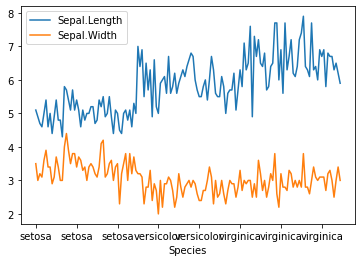

In [49]:
df_iris[['Sepal.Length','Sepal.Width']].plot()  #rough look diamensions of data

<AxesSubplot:xlabel='Species'>

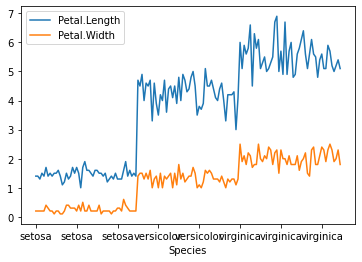

In [50]:
df_iris[['Petal.Length','Petal.Width']].plot()

In [51]:
pd.set_option('max_rows', 15)

In [52]:
df_iris.head(30)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
setosa,5.0,3.0,1.6,0.2
setosa,5.0,3.4,1.6,0.4
setosa,5.2,3.5,1.5,0.2


In [53]:
#x = [df_iris['Sepal.Length','Sepal.Width']]

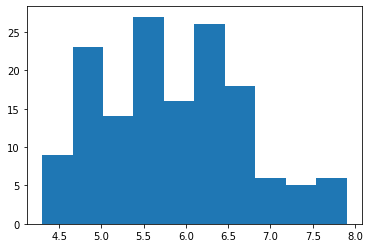

In [54]:
plt.hist(df_iris['Sepal.Length'])
plt.show()

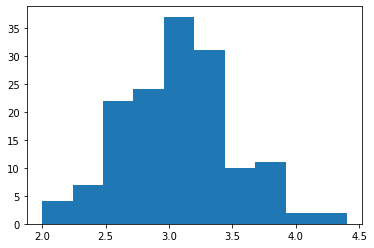

In [55]:
plt.hist(df_iris['Sepal.Width'])
plt.show()

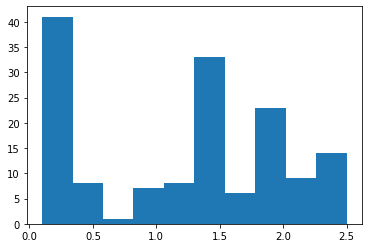

In [56]:
plt.hist(df_iris['Petal.Width'])
plt.show()

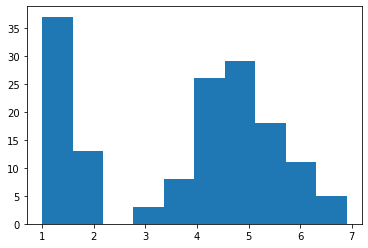

In [57]:
plt.hist(df_iris['Petal.Length'])
plt.show()

In [58]:
#we are using equal frq discretization

# Method 1

In [1]:
#from feature_engine.discretisation import KBinsDiscretisation

In [2]:
#from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser


In [3]:
disc = EqualWidthDiscretiser(bins=5, variables=['Sepal.Length','Sepal.Width'])

In [4]:
print(disc)

EqualWidthDiscretiser(bins=5, variables=['Sepal.Length', 'Sepal.Width'])


In [63]:
disc.fit(df_iris)

EqualWidthDiscretiser(bins=5, variables=['Sepal.Length', 'Sepal.Width'])

In [64]:
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [65]:
discre = disc.transform(df_iris)

In [66]:
pd.set_option('max_rows', 60)

In [67]:
discre.tail(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
virginica,3,2,5.6,2.4
virginica,3,2,5.1,2.3
virginica,2,1,5.1,1.9
virginica,3,2,5.9,2.3
virginica,3,2,5.7,2.5
virginica,3,2,5.2,2.3
virginica,2,1,5.0,1.9
virginica,3,2,5.2,2.0
virginica,2,2,5.4,2.3


In [68]:
disc.binner_dict_

{'Sepal.Length': [-inf, 5.02, 5.74, 6.46, 7.18, inf],
 'Sepal.Width': [-inf,
  2.48,
  2.96,
  3.4400000000000004,
  3.9200000000000004,
  inf]}

In [69]:
disc1 = EqualWidthDiscretiser(bins=5, variables=['Petal.Length','Petal.Width'])

In [70]:
disc1.fit(df_iris)

EqualWidthDiscretiser(bins=5, variables=['Petal.Length', 'Petal.Width'])

In [71]:
discre1 = disc1.transform(df_iris)

In [72]:
discre1.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
virginica,6.7,3.0,3,4
virginica,6.3,2.5,3,3
virginica,6.5,3.0,3,3
virginica,6.2,3.4,3,4
virginica,5.9,3.0,3,3


In [73]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
disc1.binner_dict_

{'Petal.Length': [-inf,
  2.18,
  3.3600000000000003,
  4.540000000000001,
  5.720000000000001,
  inf],
 'Petal.Width': [-inf, 0.58, 1.06, 1.54, 2.02, inf]}

In [75]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Method 2

In [5]:
#df_iris['S_Len'] = pd.cut(df_iris['Sepal.Length'], bins=[8, 4, 0], labels= ['max_length','min_length','Avg_len','micro_len'])

In [97]:
df_iris['S_Len'] = pd.cut(df_iris['Sepal.Length'], bins=[ 4.3, 5.84, 7.9, 8], 
                          labels= ['min_length','max_length','Avg_len'])

In [99]:
df_iris['S_Wid'] = pd.cut(df_iris['Sepal.Width'], bins=[2,3.05,4.40,7], 
                          labels= ['min_Width','Avg_Width','max_Width'])

In [100]:
df_iris['P_len'] = pd.cut(df_iris['Petal.Length'], bins=[1, 3.75, 6.9,8], 
                          labels= ['minP_len','AvgP_len','maxP_len'])

In [101]:
df_iris['P_Wid'] = pd.cut(df_iris['Petal.Width'], bins=[0.1, 1.1, 2.5 ,4], 
                          labels= ['minP_wed','AvgP_wed','maxP_wed'])

In [102]:
df_iris #Discretization dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,S_Len,S_Wid,P_len,P_Wid
Species,,,,,,,,
setosa,5.1,3.5,1.4,0.2,min_length,Avg_Width,minP_len,minP_wed
setosa,4.9,3.0,1.4,0.2,min_length,min_Width,minP_len,minP_wed
setosa,4.7,3.2,1.3,0.2,min_length,Avg_Width,minP_len,minP_wed
setosa,4.6,3.1,1.5,0.2,min_length,Avg_Width,minP_len,minP_wed
setosa,5.0,3.6,1.4,0.2,min_length,Avg_Width,minP_len,minP_wed
...,...,...,...,...,...,...,...,...
virginica,6.7,3.0,5.2,2.3,max_length,min_Width,AvgP_len,AvgP_wed
virginica,6.3,2.5,5.0,1.9,max_length,min_Width,AvgP_len,AvgP_wed
virginica,6.5,3.0,5.2,2.0,max_length,min_Width,AvgP_len,AvgP_wed
